# Final Projects: Calculating evolutionary distance

In this notebook you will compare the amino acid sequence of hemoglobin alpha from 3 different species to find out which two are most closely related.

You'll need to copy and paste the function from last class that finds the number of differences in two sequences:

In [119]:
#The function we used to find the number of differences between  arguments that are in strings. 
def num_of_differences(Aminoseq1, Aminoseq2):
    differences = 0
    for letter in range(len(Aminoseq1)):
        if Aminoseq2[letter] != letter:
                differences += 1
    print("there are", differences,"differences in these sequences")

In order to compare the different amino acid sequences, we need to open the files and read the sequences into new variables:

In [120]:

Mouse = open("5_mouse_CYTB_DNA.txt").read()
Hedgehog = open("5_hedgehog_CYTB_DNA.txt").read()
Rabbit = open("5_rabbit_CYTB_DNA.txt").read()

Decide as a group whether you want to compare DNA or protein sequences for your species. What are the pros and cons of each?

In [121]:
#These are our transcribe and translate functions.
def RNAfunc(DNAtype):
    myDict = {"A":"U", "T": "A", "G":"C", "C":"G"}
    RNAseq = ""
    for letter in DNAtype:
        RNAseq += myDict[letter] 
    return RNAseq

def aminotrans(rnaseq):
    ProteinDict = {"UUU":"F", "UUC":"F", "UUA":"L", "UUG":"L", "CUU":"L", "CUC":"L", "CUA":"L", "CUG":"L", "AUU":"I", "AUC":"I", "AUA":"I", "AUG":"M", "GUU":"V", "GUC":"V", "GUA":"V", "GUG":"V", "UCU":"S", "UCC":"S", "UCA":"S", "UCG":"S", "CCU":"P", "CCC":"P", "CCA":"P", "CCG":"P", "ACU":"T", "ACC":"T", "ACA":"T", "ACG":"T", "GCU":"A", "GCC":"A", "GCA":"A", "GCG":"A", "UAU":"Y", "UAC":"Y", "UAA":"X", "UAG":"X", "CAU":"H", "CAC":"H", "CAA":"Q", "CAG":"Q", "AAU": "N", "AAC":"N", "AAA":"K", "AAG":"K", "GAU":"D", "GAC":"D", "GAA":"E", "GAG":"E", "UGU":"C", "UGC":"C", "UGA":"X", "UGG":"W", "CGU":"R", "CGC":"R", "CGA":"R", "CGG":"R", "AGU":"S", "AGC":"S", "AGA":"R", "AGG":"R", "GGU":"G", "GGC":"G", "GGA":"G", "GGG":"G"} 
    codon = ""
    protein = ""
    for base in rnaseq:
        codon += base
        if len(codon) == 3:
            protein += ProteinDict[codon]
            codon = ""
    return protein

In [122]:
M1 = (aminotrans(RNAfunc(Mouse)))
H1 = (aminotrans(RNAfunc(Hedgehog)))
R1 = (aminotrans(RNAfunc(Rabbit)))

Now call the number of differences function 3 times to compare all three of your species' sequences.

In [123]:
#Here we're looking for the number of differences of each protein sequences
num_of_differences(R1, M1)
num_of_differences(H1, M1)
num_of_differences(H1, R1)


there are 380 differences in these sequences
there are 380 differences in these sequences
there are 380 differences in these sequences


In [125]:
#Here we're looking for the number of differences of each DNA sequences
num_of_differences(Rabbit, Mouse)
num_of_differences(Hedgehog, Mouse)
num_of_differences(Hedgehog, Rabbit)

there are 1140 differences in these sequences
there are 1140 differences in these sequences
there are 1140 differences in these sequences


What can you conclude based on the number of differences between each pair of species?

Next, create a function that returns the percent difference between sequences and call it for your three comparisons:

In [115]:
def percent_diff(seq1, seq2):
    difference = 0
   
    for i, aa in enumerate(seq1):
        if seq2[i] != aa:
               difference += 1
   
    percent = difference / len(seq1) * 100
   
    return percent

In [130]:
print(percent_diff(R1, M1))
print(percent_diff(H1, R1))
print(percent_diff(H1, M1))

16.842105263157894
17.894736842105264
21.842105263157897


In [131]:
mrp = (percent_diff(R1, M1))
hrp = (percent_diff(H1, R1))
hmp = (percent_diff(H1, M1))

In [144]:
print(percent_diff(Rabbit, Mouse))
print(percent_diff(Hedgehog, Rabbit))
print(percent_diff(Hedgehog, Mouse))

23.24561403508772
25.438596491228072
26.49122807017544


In [145]:
dmrp = (percent_diff(Rabbit, Mouse))
dhrp = (percent_diff(Hedgehog, Rabbit))
dhmp = (percent_diff(Hedgehog, Mouse))

Let's visualize these results! Choose a graph type that you think will communicate your conclusions effectively and create it using matplotlib:

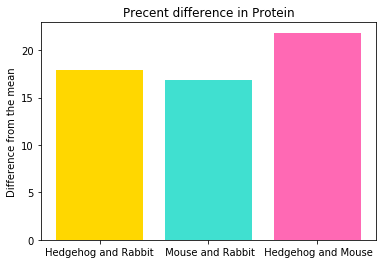

In [146]:
#Protein Visualization
import matplotlib.pyplot as plt

plt.clf()
plt.bar(1, hrp, color = "gold")
plt.bar(2, mrp, color = "turquoise")
plt.bar(3, hmp, color = "hotpink")

plt.title("Precent difference in Protein")
plt.ylabel("Difference from the mean")
plt.xticks([1,2,3],('Hedgehog and Rabbit',' Mouse and Rabbit',' Hedgehog and Mouse'))
plt.savefig("my_bar.png")
plt.show()

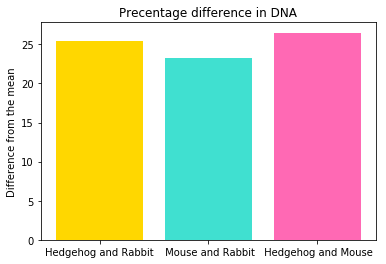

In [147]:
#DNA Visulization

plt.clf()
plt.bar(1, dhrp, color = "gold")
plt.bar(2, dmrp, color = "turquoise")
plt.bar(3, dhmp, color = "hotpink")

plt.title("Precentage difference in DNA")
plt.ylabel("Difference from the mean")
plt.xticks([1,2,3],('Hedgehog and Rabbit',' Mouse and Rabbit',' Hedgehog and Mouse'))
plt.savefig("my_bar.png")
plt.show()

## Coding Challenge
If you finish your project and want to try a challenge, come up with a hypothesis about which of the following species are most closely related to humans (carp, chicken, chimp, dog, eel, elephant, frog, gorilla, macaque monkey, mouse, orangutan, pig). Write out a ranked list with the species you think is most related to humans at the top.

Then calculate the percent difference between the hemoglobin amino acid sequences of humans and each species to find out how close you came to the right ranking!